In [1]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [2]:
df = pd.read_csv('main1.csv')
df.head()

,std,mean,solidity,hist_hue5,std_v,canny_edges_mean,hist_hue2,canny_edges_std,mean_H,feature_181,...,NaI,energy,std_R,hist_hue39,b_sqrt,hist_hue44,NBI,hist_value1,mean_b,label
0,-1.541988,-0.636399,0.027090,-0.319468,1.110275,-1.034481,-0.374966,-0.971115,0.035082,-0.594504,...,-1.222307,0.260809,-0.589118,-0.250197,1.402781,0.344540,0.007380,-0.142360,1.413693,0
1,-0.461202,0.631790,-0.125862,-0.490414,-0.327106,0.484966,-0.498869,0.597380,0.200445,-0.594504,...,0.253234,-0.256399,0.694681,-0.304659,-0.480920,-0.517704,-1.450854,-0.139556,-0.490484,0
2,-1.368511,-0.301142,-1.210674,-0.479651,0.168901,0.373189,-0.493399,0.511859,-0.114343,0.425434,...,-1.096522,-0.177009,0.121255,-0.298097,0.599403,-0.514652,-0.748915,-0.137873,0.590018,0
3,-1.510080,-0.717689,0.184322,-0.504343,-1.299392,-0.576578,-0.501485,-0.384116,0.373520,-0.084535,...,2.449737,-0.161403,-0.989295,-0.305315,-1.752813,-0.517704,-3.257197,-0.142360,-1.722720,0
4,-1.827898,-1.036748,0.983762,-0.497378,0.192236,-1.225424,-0.494350,-1.263919,0.770605,0.425434,...,0.907521,0.250593,-0.419422,-0.286286,-1.576289,-0.511600,-1.176523,-0.142360,-1.554277,0


In [9]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
X_train = train_data.drop(columns=["label"])
y_train = train_data["label"]
X_test = test_data.drop(columns=["label"])
y_test = test_data["label"]

Accuracy: 0.9832
Precision: 0.9833
Recall: 0.9832
F1-score: 0.9832
Confusion Matrix:


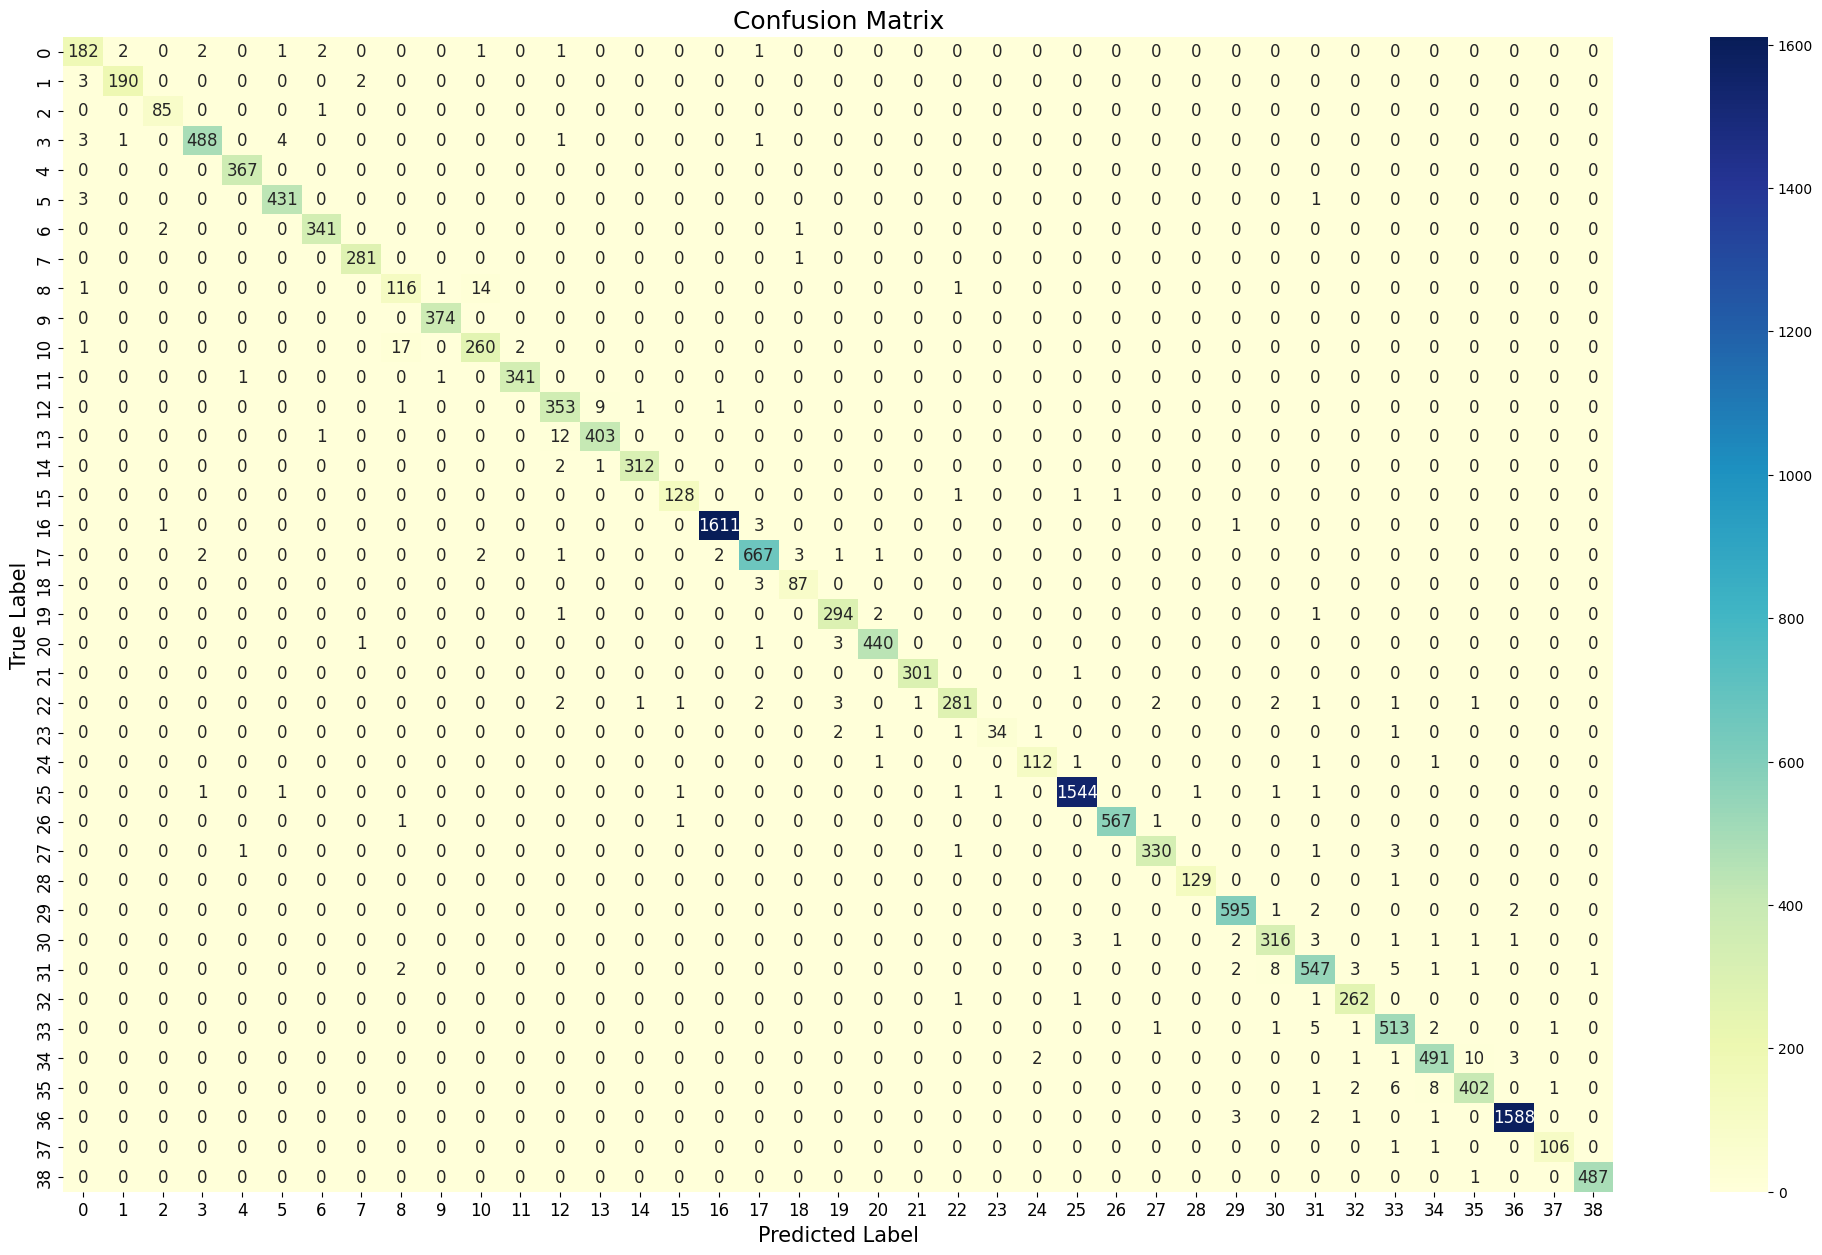

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

svm = SVC(C=100, gamma='scale', kernel='rbf', random_state=42)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Adjusted for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # Adjusted for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')  # Adjusted for multiclass
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion Matrix:")

plt.figure(figsize=(25, 15))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=True, annot_kws={"size": 12})
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()  
# 9824 | 61 9828, 65 9830, 69 9832, 73 9828

# k fold

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import numpy as np

# Giả sử df là DataFrame đã được định nghĩa
X = df.drop(columns=["label"])
y = df["label"]

# Định nghĩa mô hình SVM
svm = SVC(C=100, gamma='scale', kernel='rbf')

# Sử dụng StratifiedKFold để tạo k-folds
kf = StratifiedKFold(n_splits=10)

# Để lưu trữ các kết quả của từng fold
accuracies = []
f1_scores = []
recalls = []
precisions = []

# Thực hiện cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Huấn luyện mô hình
    svm.fit(X_train, y_train)
    
    # Dự đoán trên tập kiểm tra
    y_pred = svm.predict(X_test)
    
    # Tính toán các chỉ số
    accuracies.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))

# Tính toán trung bình và độ lệch chuẩn
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)

f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)

recall_mean = np.mean(recalls)
recall_std = np.std(recalls)

precision_mean = np.mean(precisions)
precision_std = np.std(precisions)

# In kết quả
print(f"Mean Accuracy: {accuracy_mean:.4f} ± {accuracy_std:.4f}")
print(f"Mean F1 Score: {f1_mean:.4f} ± {f1_std:.4f}")
print(f"Mean Recall: {recall_mean:.4f} ± {recall_std:.4f}")
print(f"Mean Precision: {precision_mean:.4f} ± {precision_std:.4f}")


Mean Accuracy: 0.9851 ± 0.0015
Mean F1 Score: 0.9851 ± 0.0015
Mean Recall: 0.9851 ± 0.0015
Mean Precision: 0.9852 ± 0.0015


# repeated hold out


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

X = df.drop(columns=["label"])
y = df["label"]
svm = SVC(C=100, gamma='scale', kernel='rbf')
n_repeats = 50
scoring = ['accuracy', 'f1', 'recall', 'precision']
results = {metric: [] for metric in scoring}

for _ in range(n_repeats):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=None)
    
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    
    for metric in scoring:
        if metric == 'accuracy':
            results[metric].append(accuracy_score(y_test, y_pred))
        elif metric == 'f1':
            results[metric].append(f1_score(y_test, y_pred, average='weighted'))
        elif metric == 'recall':
            results[metric].append(recall_score(y_test, y_pred, average='weighted'))
        elif metric == 'precision':
            results[metric].append(precision_score(y_test, y_pred, average='weighted'))

mean_results = {}
std_results = {}
for metric in scoring:
    metric_values = results[metric]
    mean_results[metric] = np.mean(metric_values)
    std_results[metric] = np.std(metric_values)

print("Mean Accuracy:", mean_results['accuracy'], "±", std_results['accuracy'])
print("Mean F1 Score:", mean_results['f1'], "±", std_results['f1'])
print("Mean Recall:", mean_results['recall'], "±", std_results['recall'])
print("Mean Precision:", mean_results['precision'], "±", std_results['precision'])


Mean Accuracy: 0.9824069732491734 ± 0.000971889806163889
Mean F1 Score: 0.9823862148140193 ± 0.0009725927772862195
Mean Recall: 0.9824069732491734 ± 0.000971889806163889
Mean Precision: 0.9824402766710552 ± 0.0009715853247962772


# All

In [5]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import numpy as np

X = df.drop(columns=["label"])
y = df["label"]

models = {
    'SVC': SVC(C=100, gamma='scale', kernel='rbf'),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'LogisticRegression': LogisticRegression(max_iter=10000),
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='manhattan', n_jobs=-1),
    'DecisionTree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=100),
    'CatBoost': CatBoostClassifier(verbose=0),
    'HistGradientBoosting': HistGradientBoostingClassifier(),
    'GaussianNB': GaussianNB()
}

kf = StratifiedKFold(n_splits=10)

results = {model_name: {'accuracy': [], 'f1': [], 'recall': [], 'precision': []} for model_name in models}

for model_name, model in models.items():
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        results[model_name]['accuracy'].append(accuracy_score(y_test, y_pred))
        results[model_name]['f1'].append(f1_score(y_test, y_pred, average='weighted'))
        results[model_name]['recall'].append(recall_score(y_test, y_pred, average='weighted'))
        results[model_name]['precision'].append(precision_score(y_test, y_pred, average='weighted'))

for model_name in models:
    accuracy_mean = np.mean(results[model_name]['accuracy'])
    accuracy_std = np.std(results[model_name]['accuracy'])
    
    f1_mean = np.mean(results[model_name]['f1'])
    f1_std = np.std(results[model_name]['f1'])
    
    recall_mean = np.mean(results[model_name]['recall'])
    recall_std = np.std(results[model_name]['recall'])
    
    precision_mean = np.mean(results[model_name]['precision'])
    precision_std = np.std(results[model_name]['precision'])
    
    print(f"{model_name} Mean Accuracy: {accuracy_mean:.4f} ± {accuracy_std:.4f}")
    print(f"{model_name} Mean F1 Score: {f1_mean:.4f} ± {f1_std:.4f}")
    print(f"{model_name} Mean Recall: {recall_mean:.4f} ± {recall_std:.4f}")
    print(f"{model_name} Mean Precision: {precision_mean:.4f} ± {precision_std:.4f}")
    print("-" * 50)


SVC Mean Accuracy: 0.9851 ± 0.0015
SVC Mean F1 Score: 0.9851 ± 0.0015
SVC Mean Recall: 0.9851 ± 0.0015
SVC Mean Precision: 0.9852 ± 0.0015
--------------------------------------------------
RandomForest Mean Accuracy: 0.9616 ± 0.0019
RandomForest Mean F1 Score: 0.9611 ± 0.0019
RandomForest Mean Recall: 0.9616 ± 0.0019
RandomForest Mean Precision: 0.9618 ± 0.0019
--------------------------------------------------
LogisticRegression Mean Accuracy: 0.9564 ± 0.0026
LogisticRegression Mean F1 Score: 0.9562 ± 0.0026
LogisticRegression Mean Recall: 0.9564 ± 0.0026
LogisticRegression Mean Precision: 0.9564 ± 0.0027
--------------------------------------------------
KNN Mean Accuracy: 0.9501 ± 0.0023
KNN Mean F1 Score: 0.9496 ± 0.0023
KNN Mean Recall: 0.9501 ± 0.0023
KNN Mean Precision: 0.9504 ± 0.0023
--------------------------------------------------
DecisionTree Mean Accuracy: 0.8500 ± 0.0058
DecisionTree Mean F1 Score: 0.8500 ± 0.0059
DecisionTree Mean Recall: 0.8500 ± 0.0058
DecisionTree M

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

X = df.drop(columns=["label"])
y = df["label"]

models = {
    'SVC': SVC(C=100, gamma='scale', kernel='rbf'),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'LogisticRegression': LogisticRegression(max_iter=10000),
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='manhattan', n_jobs=-1),
    'DecisionTree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=100),
    'CatBoost': CatBoostClassifier(verbose=0),
    'HistGradientBoosting': HistGradientBoostingClassifier(),
    'GaussianNB': GaussianNB()
}

n_repeats = 10
scoring = ['accuracy', 'f1', 'recall', 'precision']
results = {model_name: {metric: [] for metric in scoring} for model_name in models}

for model_name, model in models.items():
    for _ in range(n_repeats):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=None)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        for metric in scoring:
            if metric == 'accuracy':
                results[model_name][metric].append(accuracy_score(y_test, y_pred))
            elif metric == 'f1':
                results[model_name][metric].append(f1_score(y_test, y_pred, average='weighted'))
            elif metric == 'recall':
                results[model_name][metric].append(recall_score(y_test, y_pred, average='weighted'))
            elif metric == 'precision':
                results[model_name][metric].append(precision_score(y_test, y_pred, average='weighted'))

mean_results = {model_name: {} for model_name in models}
std_results = {model_name: {} for model_name in models}

for model_name in models:
    for metric in scoring:
        metric_values = results[model_name][metric]
        mean_results[model_name][metric] = np.mean(metric_values)
        std_results[model_name][metric] = np.std(metric_values)

for model_name in models:
    print(f"{model_name} Mean Accuracy: {mean_results[model_name]['accuracy']:.4f} ± {std_results[model_name]['accuracy']:.4f}")
    print(f"{model_name} Mean F1 Score: {mean_results[model_name]['f1']:.4f} ± {std_results[model_name]['f1']:.4f}")
    print(f"{model_name} Mean Recall: {mean_results[model_name]['recall']:.4f} ± {std_results[model_name]['recall']:.4f}")
    print(f"{model_name} Mean Precision: {mean_results[model_name]['precision']:.4f} ± {std_results[model_name]['precision']:.4f}")
    print("-" * 50)


SVC Mean Accuracy: 0.9823 ± 0.0005
SVC Mean F1 Score: 0.9822 ± 0.0005
SVC Mean Recall: 0.9823 ± 0.0005
SVC Mean Precision: 0.9823 ± 0.0005
--------------------------------------------------
RandomForest Mean Accuracy: 0.9568 ± 0.0013
RandomForest Mean F1 Score: 0.9561 ± 0.0013
RandomForest Mean Recall: 0.9568 ± 0.0013
RandomForest Mean Precision: 0.9567 ± 0.0013
--------------------------------------------------
LogisticRegression Mean Accuracy: 0.9539 ± 0.0011
LogisticRegression Mean F1 Score: 0.9537 ± 0.0011
LogisticRegression Mean Recall: 0.9539 ± 0.0011
LogisticRegression Mean Precision: 0.9538 ± 0.0010
--------------------------------------------------
KNN Mean Accuracy: 0.9445 ± 0.0017
KNN Mean F1 Score: 0.9440 ± 0.0017
KNN Mean Recall: 0.9445 ± 0.0017
KNN Mean Precision: 0.9446 ± 0.0018
--------------------------------------------------
DecisionTree Mean Accuracy: 0.8374 ± 0.0033
DecisionTree Mean F1 Score: 0.8377 ± 0.0031
DecisionTree Mean Recall: 0.8374 ± 0.0033
DecisionTree M

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55448 entries, 0 to 55447
Data columns (total 70 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   std                 55448 non-null  float64
 1   mean                55448 non-null  float64
 2   solidity            55448 non-null  float64
 3   hist_hue5           55448 non-null  float64
 4   std_v               55448 non-null  float64
 5   canny_edges_mean    55448 non-null  float64
 6   hist_hue2           55448 non-null  float64
 7   canny_edges_std     55448 non-null  float64
 8   mean_H              55448 non-null  float64
 9   feature_181         55448 non-null  float64
 10  hist_hue11          55448 non-null  float64
 11  std_U               55448 non-null  float64
 12  hist_hue10          55448 non-null  float64
 13  entropy             55448 non-null  float64
 14  harris_formula_sum  55448 non-null  float64
 15  H_sqrt              55448 non-null  float64
 16  corn